# DSAI 1303 - Data Science Programming Languages 
## Course Project: Biomedical Image Analysis in Python
------------------------------------------

Please note the following regarding homework submissions:

* No email submissions will be accepted under any circumstances.
* The hw is to be solved individually. Any similaraty in hws will lead to 0 for all students involved.
* Once you write all codes in their corresponding cells, go to File -> download as -> notebook (.ipynb). Then submit the downloaded notebook.
* If you make a mistake, you can resubmit. The Google Classroom will consider the last submission.
* Once you submit, download your submitted file and check that the cells contain code and they are not empty. If you submit empty cells, you will get 0.
## Instructions:
- Solve Questions in the respective cells below. __Make sure you fill in any place that says `YOUR CODE HERE`.__        

### Note:
- You should write comments to help other programmers understand your code.
- Do not use magic numbers and define the constants value as a constant variable.
- Name your variables based on Variable Naming Conventions rules.



Here, we'll work with magnetic resonance (MR) imaging data from the Sunnybrook Cardiac Dataset. The full image is a 3D time series spanning a single heartbeat. These data are used by radiologists to measure the ejection fraction: the proportion of blood ejected from the left ventricle during each stroke.

To achaive this project you should refer to next source:

https://sakibreza.github.io/biomedical/

### Let's import one sample 

You may refer to next source to download sample with number SCD2001_MR_117:

https://www.kaggle.com/datasets/salikhussaini49/sunnybrook-cardiac-mri

In [1]:
!pip install nibabel

### Show the image

In [2]:
#loads an image using the imageio.imread function and assigns it to the variable im.
import matplotlib.pyplot as plt
import imageio
im = imageio.imread("SCD2001_MR_117 (3).dcm")

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (256, 256)


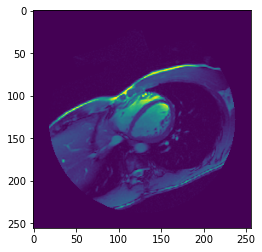

In [7]:
plt.imshow(im)

### Make the plot with grayscale

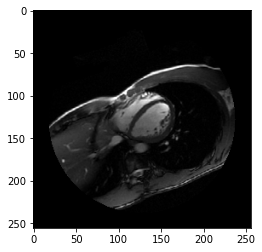

In [8]:
plt.imshow(im, cmap='gray')
#colormap as grayscale with the cmap='gray' parameter.

### Make plot the colorbar 

Data type: int16
Min. value: 0
Max value: 255


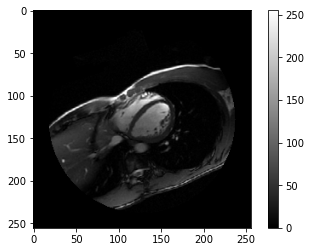

In [14]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Load the hand radiograph
im = imageio.imread("SCD2001_MR_117 (3).dcm")
## Print the data type of the image
print('Data type:', im.dtype)
# Print the minimum value in the image array
print('Min. value:', im.min())
# Print the maximum value in the image array
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
# Add a colorbar to the plot
plt.colorbar()

### Rotation

Rotate the figure and show both of them

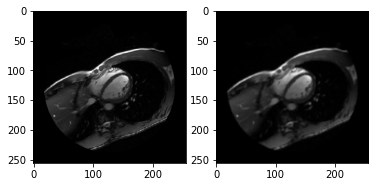

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Load the image and convert to grayscale

# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
# Display the original image in the first subplot
axes[0].imshow(im, cmap='gray')
# Display the filtered image in the second subplot
axes[1].imshow(im_filt, cmap='gray')
plt.show()

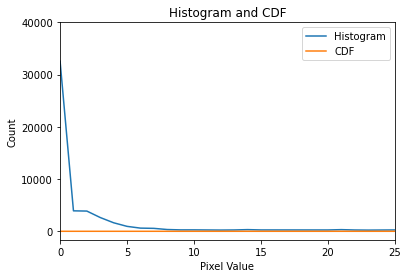

In [20]:
# Import necessary libraries
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Create the plot
fig, ax = plt.subplots()

# Plot the histogram and CDF
ax.plot(hist, label='Histogram')
ax.plot(cdf, label='CDF')

# Set axis limits and ticks
ax.set_xlim([0, 25])
ax.set_xticks(range(0, 26, 5))
ax.set_yticks([0, 10000, 20000, 30000, 40000])

# Set axis labels and title
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Count')
ax.set_title('Histogram and CDF')

# Add legend
ax.legend()

# Show the plot
plt.show()

### Histogram

Plot the histogram as shown below 

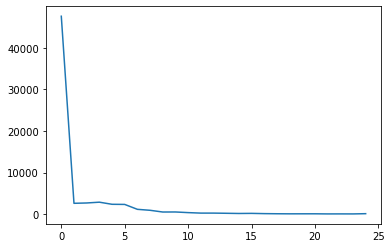

In [57]:
# YOUR CODE HERE


### Mask

Create next mask

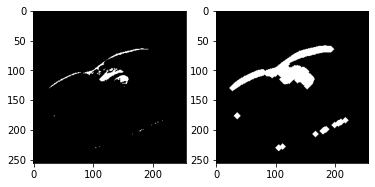

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

# Define image array 'im'

# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')

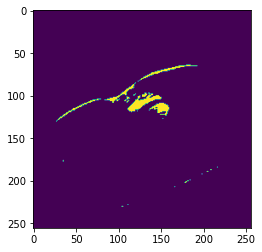

In [61]:
# Create and tune bone mask
mask_bone = im>=145

# Plot masked image
plt.imshow(mask_bone)

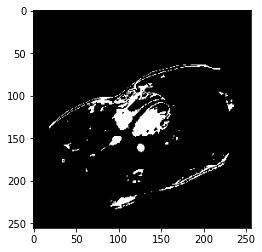

In [95]:
# YOUR CODE HERE


### Show selected part

Show the part selected by using previous mask

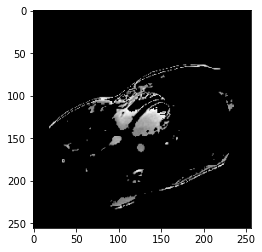

In [96]:
# YOUR CODE HERE


### Tune a mask

Tune the previous maske as follows

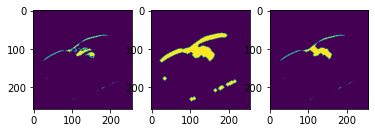

In [26]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

# Define image array 'im'

# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)

### Show result of running mask

AxesImage(54,36;334.8x217.44)


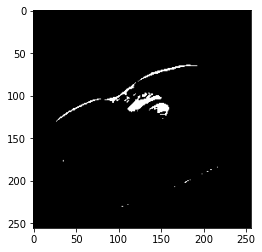

In [35]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

# Define image array 'im'

# Create and tune bone mask
mask_bone = im >= 145
visible_mask = 1 - mask_bone

# Plot masked image
fig, axes = plt.subplots(1, 1)
axes.imshow(visible_mask, cmap='gray_r')
print(axes.imshow(visible_mask, cmap='gray_r'))

### Edge detection

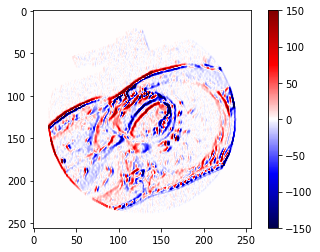

In [28]:
# YOUR CODE HERE
# Set weights to detect vertical edges
weights = [[+1, 0, -1], [+1, 0, -1], [+1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()

## Segmentation

### Identify labels

Num. Labels: 26


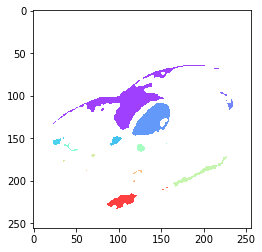

In [45]:
# YOUR CODE HERE
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt>60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:',nlabels)

# Create a `labels` overlay
overlay = np.where(labels>0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=0.75)

### Select objects

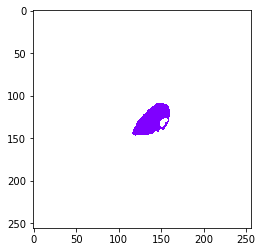

In [49]:
# YOUR CODE HERE
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

### Extract specific object

In [7]:
# YOUR CODE HERE
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image

plt.imshow(im_lv, cmap='gray')# YOUR CODE HERE
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image

plt.imshow(im_lv, cmap='gray')

NameError: name 'ndi' is not defined

The End